In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

### 서울시 가구원 2019년도

In [4]:
soup = pd.read_csv('./cctv/서울가구원_2015.tsv', sep='\t', header=1)
soup.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3


In [5]:
soup.rename({'기간': '기간', '구분': '구별', '일반가구수': '일반가구수', '1인': '1인',
            '2인': '2인', '3인' : '3인', '4인':'4인', '5인' :'5인', '6인':'6인', '7인 이상':'7인이상', '평균가구원수': '평균가구원수'}, inplace=True, axis=1)
soup.head()

,기간,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
0,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3


In [6]:
soup.drop([0], inplace= True)
soup.head()

,기간,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3
5,2019,광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288,2.2


In [7]:
soup2 = soup[['구별','일반가구수','1인','2인','3인','4인','5인','6인','7인이상']]
soup2.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상
1,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143
2,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102
3,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171
4,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253
5,광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288


In [8]:
soup2['일반가구수'] = soup2['일반가구수'].map(lambda s: int(s.replace(',','')))
soup2['1인'] = soup2['1인'].map(lambda s: int(s.replace(',','')))
soup2['2인'] = soup2['2인'].map(lambda s: int(s.replace(',','')))
soup2['3인'] = soup2['3인'].map(lambda s: int(s.replace(',','')))
soup2['4인'] = soup2['4인'].map(lambda s: int(s.replace(',','')))
soup2['5인'] = soup2['5인'].map(lambda s: int(s.replace(',','')))
soup2['6인'] = soup2['6인'].map(lambda s: int(s.replace(',','')))
soup2['7인이상'] = soup2['7인이상'].map(lambda s: int(s.replace(',','')))

In [9]:
soup2.tail()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상
21,관악구,242154,119863,55423,34875,24563,5806,1283,341
22,서초구,155377,42667,38892,35327,29850,6704,1503,434
23,강남구,206524,66073,51560,43435,35800,7671,1564,421
24,송파구,252212,68861,65402,57821,47607,10014,2038,469
25,강동구,162976,45188,43297,36735,29461,6606,1333,356


In [10]:
soup2['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [11]:
soup2['4인 이상'] = soup2['4인'] + soup2['5인'] + soup2['6인'] + 7*soup2['7인이상']
soup2['평균가구원수'] = (soup2['1인'] + 2*soup2['2인'] + 3*soup2['3인'] + 4*soup2['4인'] + 5*soup2['5인'] + 6*soup2['6인'] + 7*soup2['7인이상']) / soup2['일반가구수']
soup2.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,4인 이상,평균가구원수
1,종로구,62652,24671,16208,11154,7828,2143,505,143,11477,2.180409
2,중구,54496,22078,14578,9540,6292,1533,373,102,8912,2.121972
3,용산구,93177,35148,25164,17439,11736,2907,612,171,16452,2.190895
4,성동구,122770,41488,32125,25634,18379,4014,877,253,25041,2.307233
5,광진구,149905,58714,35678,28054,21454,4711,1006,288,29187,2.212435


In [12]:
soup2['1인 비율'] = soup2['1인'] / soup2['일반가구수'] * 100
soup2['4인이상 비율'] = soup2['4인 이상'] / soup2['일반가구수'] * 100
soup2.tail()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,4인 이상,평균가구원수,1인 비율,4인이상 비율
21,관악구,242154,119863,55423,34875,24563,5806,1283,341,34039,1.952068,49.498666,14.056757
22,서초구,155377,42667,38892,35327,29850,6704,1503,434,41095,2.519086,27.460306,26.448573
23,강남구,206524,66073,51560,43435,35800,7671,1564,421,47982,2.388991,31.992892,23.233135
24,송파구,252212,68861,65402,57821,47607,10014,2038,469,62942,2.494477,27.302825,24.955989
25,강동구,162976,45188,43297,36735,29461,6606,1333,356,39892,2.474910,27.726782,24.477224


In [13]:
del soup2['4인']
del soup2['5인']
del soup2['6인']
del soup2['7인이상']
soup2.head()

,구별,일반가구수,1인,2인,3인,4인 이상,평균가구원수,1인 비율,4인이상 비율
1,종로구,62652,24671,16208,11154,11477,2.180409,39.377833,18.318649
2,중구,54496,22078,14578,9540,8912,2.121972,40.513065,16.353494
3,용산구,93177,35148,25164,17439,16452,2.190895,37.721755,17.656718
4,성동구,122770,41488,32125,25634,25041,2.307233,33.793272,20.396677
5,광진구,149905,58714,35678,28054,29187,2.212435,39.167473,19.470331


### 서울시 인구 현황

In [14]:
pop = pd.read_csv('./cctv/서울시 인구.tsv', sep='\t', header=2)
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.20,"1,552,356"
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"


In [15]:
del pop['기간']
del pop['세대']
del pop['남자']
del pop['남자.1']
del pop['남자.2']
del pop['여자']
del pop['여자.1']
del pop['여자.2']
del pop['세대당인구']
pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [16]:
pop.rename({'자치구': '구별', '계': '인구수', '계.1': '내국인', '계.2': '외국인',
            '65세이상고령자': '고령자'}, inplace=True, axis=1)
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [17]:
pop['인구수'] = pop['인구수'].map(lambda s: int(s.replace(',','')))
pop['내국인'] = pop['내국인'].map(lambda s: int(s.replace(',','')))
pop['외국인'] = pop['외국인'].map(lambda s: int(s.replace(',','')))
pop['고령자'] = pop['고령자'].map(lambda s: int(s.replace(',','')))
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [18]:
pop.drop([0], inplace= True)
pop.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [19]:
# 외국인 비율 & 고령자 비율 추가 
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [20]:
# 인구수 기준 정렬(내림차순)
pop.sort_values(by='인구수', ascending=False).head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
23,강남구,544085,539235,4850,73942,0.891405,13.590156
11,노원구,529532,525486,4046,84612,0.764071,15.978638
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [21]:
# merge를 사용하여 병합
drf = pd.merge(pop, soup2, on='구별')
drf.tail(11)

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인 이상,평균가구원수,1인 비율,4인이상 비율
14,양천구,460048,456240,3808,64804,0.827740,14.086356,162867,36345,41435,40897,46206,2.638546,22.315755,28.370388
15,강서구,589536,583544,5992,88052,1.016393,14.935814,240135,79371,63517,49322,50535,2.328890,33.052658,21.044413
16,구로구,435751,405579,30172,69312,6.924138,15.906332,160378,47740,43700,34624,36594,2.407712,29.767175,22.817344
17,금천구,249641,232157,17484,39361,7.003657,15.767041,99315,37778,25207,18771,18669,2.213593,38.038564,18.797765
18,영등포구,405982,375630,30352,60826,7.476194,14.982438,153923,58214,38671,29661,28847,2.218271,37.820209,18.741189
19,동작구,404617,393554,11063,64674,2.734191,15.984005,164963,60088,40739,32514,33326,2.269721,36.425138,20.202106
20,관악구,514555,498574,15981,78206,3.105790,15.198764,242154,119863,55423,34875,34039,1.952068,49.498666,14.056757
21,서초구,429995,426009,3986,59495,0.926988,13.836207,155377,42667,38892,35327,41095,2.519086,27.460306,26.448573
22,강남구,544085,539235,4850,73942,0.891405,13.590156,206524,66073,51560,43435,47982,2.388991,31.992892,23.233135
23,송파구,676673,670331,6342,92149,0.937233,13.617951,252212,68861,65402,57821,62942,2.494477,27.302825,24.955989


In [22]:
drf0 = pd.merge(pop, soup2, on='구별')
drf0.tail(11)

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인 이상,평균가구원수,1인 비율,4인이상 비율
14,양천구,460048,456240,3808,64804,0.827740,14.086356,162867,36345,41435,40897,46206,2.638546,22.315755,28.370388
15,강서구,589536,583544,5992,88052,1.016393,14.935814,240135,79371,63517,49322,50535,2.328890,33.052658,21.044413
16,구로구,435751,405579,30172,69312,6.924138,15.906332,160378,47740,43700,34624,36594,2.407712,29.767175,22.817344
17,금천구,249641,232157,17484,39361,7.003657,15.767041,99315,37778,25207,18771,18669,2.213593,38.038564,18.797765
18,영등포구,405982,375630,30352,60826,7.476194,14.982438,153923,58214,38671,29661,28847,2.218271,37.820209,18.741189
19,동작구,404617,393554,11063,64674,2.734191,15.984005,164963,60088,40739,32514,33326,2.269721,36.425138,20.202106
20,관악구,514555,498574,15981,78206,3.105790,15.198764,242154,119863,55423,34875,34039,1.952068,49.498666,14.056757
21,서초구,429995,426009,3986,59495,0.926988,13.836207,155377,42667,38892,35327,41095,2.519086,27.460306,26.448573
22,강남구,544085,539235,4850,73942,0.891405,13.590156,206524,66073,51560,43435,47982,2.388991,31.992892,23.233135
23,송파구,676673,670331,6342,92149,0.937233,13.617951,252212,68861,65402,57821,62942,2.494477,27.302825,24.955989


In [23]:
drf1 = drf0.set_index('구별', inplace=True)

In [24]:
drf1 = drf0

In [25]:
drf_ana = drf1[['1인 비율','4인이상 비율', '평균가구원수', '인구수', '외국인비율', '고령자비율']]
drf1_corr = drf1.corr()
drf1_corr

,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인 이상,평균가구원수,1인 비율,4인이상 비율
인구수,1.000000,0.998356,-0.170255,0.946895,-0.617271,-0.544650,0.972897,0.679380,0.979141,0.980752,0.965818,0.469856,-0.414238,0.514076
내국인,0.998356,1.000000,-0.226452,0.948076,-0.657762,-0.532195,0.969257,0.663173,0.978755,0.985788,0.972640,0.491648,-0.437154,0.534288
외국인,-0.170255,-0.226452,1.000000,-0.208276,0.818709,-0.106025,-0.130547,0.143776,-0.187745,-0.281283,-0.309020,-0.467941,0.476215,-0.449557
고령자,0.946895,0.948076,-0.208276,1.000000,-0.658402,-0.262791,0.934534,0.646343,0.970017,0.941369,0.909738,0.461497,-0.434150,0.475144
외국인비율,-0.617271,-0.657762,0.818709,-0.658402,1.000000,0.139582,-0.585550,-0.252569,-0.632091,-0.691261,-0.696556,-0.611911,0.590722,-0.617919
고령자비율,-0.544650,-0.532195,-0.106025,-0.262791,0.139582,1.000000,-0.504173,-0.395183,-0.427220,-0.494725,-0.523510,-0.208918,0.108239,-0.308593
일반가구수,0.972897,0.969257,-0.130547,0.934534,-0.585550,-0.504173,1.000000,0.821335,0.983013,0.927160,0.894920,0.282968,-0.226057,0.332984
1인,0.679380,0.663173,0.143776,0.646343,-0.252569,-0.395183,0.821335,1.000000,0.732729,0.548586,0.488704,-0.289828,0.350286,-0.220213
2인,0.979141,0.978755,-0.187745,0.970017,-0.632091,-0.427220,0.983013,0.732729,1.000000,0.957478,0.922444,0.384077,-0.347601,0.409602
3인,0.980752,0.985788,-0.281283,0.941369,-0.691261,-0.494725,0.927160,0.548586,0.957478,1.000000,0.992518,0.605949,-0.559728,0.635464


In [26]:
# 인구수가 가장 많은 지역 5
drf2 = drf.sort_values(by='인구수', ascending=False).head(10)
drf2

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인 이상,평균가구원수,1인 비율,4인이상 비율
23,송파구,676673,670331,6342,92149,0.937233,13.617951,252212,68861,65402,57821,62942,2.494477,27.302825,24.955989
15,강서구,589536,583544,5992,88052,1.016393,14.935814,240135,79371,63517,49322,50535,2.328890,33.052658,21.044413
22,강남구,544085,539235,4850,73942,0.891405,13.590156,206524,66073,51560,43435,47982,2.388991,31.992892,23.233135
10,노원구,529532,525486,4046,84612,0.764071,15.978638,201458,53365,52832,46783,50320,2.506115,26.489392,24.977911
20,관악구,514555,498574,15981,78206,3.105790,15.198764,242154,119863,55423,34875,34039,1.952068,49.498666,14.056757
11,은평구,485842,481546,4296,84353,0.884238,17.362229,184890,52814,52257,40789,41568,2.420872,28.565093,22.482557
24,강동구,462275,458058,4217,68798,0.912228,14.882483,162976,45188,43297,36735,39892,2.474910,27.726782,24.477224
14,양천구,460048,456240,3808,64804,0.827740,14.086356,162867,36345,41435,40897,46206,2.638546,22.315755,28.370388
7,성북구,449871,439719,10152,73370,2.256647,16.309120,176729,57832,44443,37033,39797,2.366895,32.723548,22.518659
16,구로구,435751,405579,30172,69312,6.924138,15.906332,160378,47740,43700,34624,36594,2.407712,29.767175,22.817344


In [27]:
drf1.head(6)

,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인 이상,평균가구원수,1인 비율,4인이상 비율
구별,,,,,,,,,,,,,,
종로구,159842,149952,9890,28396,6.187360,17.765043,62652,24671,16208,11154,11477,2.180409,39.377833,18.318649
중구,135321,125800,9521,24265,7.035863,17.931437,54496,22078,14578,9540,8912,2.121972,40.513065,16.353494
용산구,244953,229786,15167,39995,6.191800,16.327622,93177,35148,25164,17439,16452,2.190895,37.721755,17.656718
성동구,302695,295591,7104,45372,2.346917,14.989346,122770,41488,32125,25634,25041,2.307233,33.793272,20.396677
광진구,361923,348064,13859,50047,3.829268,13.828079,149905,58714,35678,28054,29187,2.212435,39.167473,19.470331
동대문구,358679,344416,14263,61408,3.976536,17.120601,148349,58152,36060,27436,28747,2.209674,39.199455,19.377953


In [28]:
drf3 = drf1.groupby(['구별'])[['1인','인구수']].mean()
drf3.head()

,1인,인구수
구별,,
강남구,66073,544085
강동구,45188,462275
강북구,42791,313550
강서구,79371,589536
관악구,119863,514555


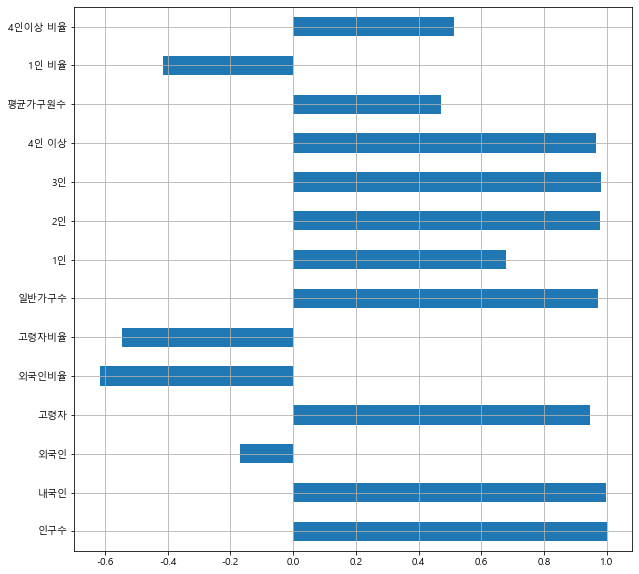

In [29]:
drf1_corr['인구수'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

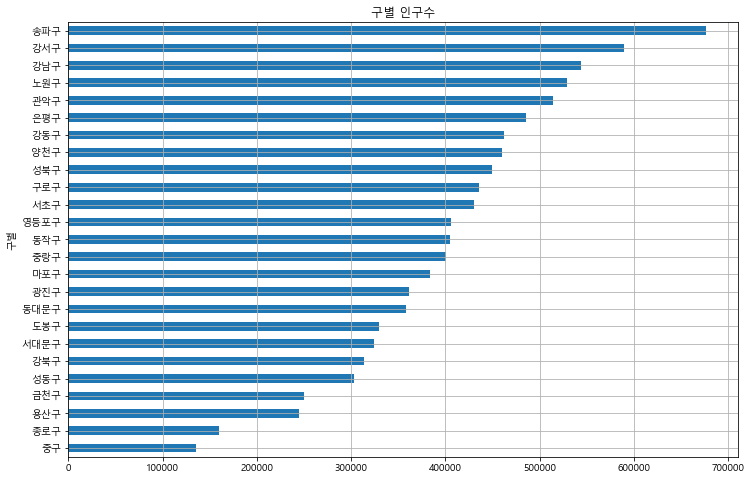

In [30]:
drf1['인구수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 인구수')
plt.show()

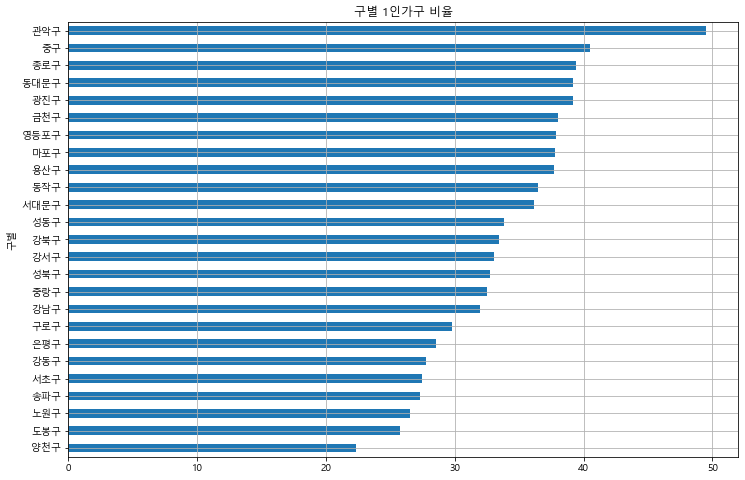

In [31]:
drf1['1인 비율'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 1인가구 비율')
plt.show()

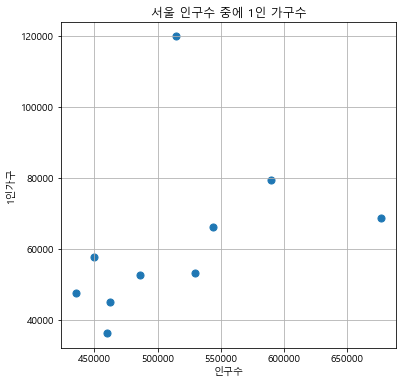

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(drf2['인구수'], drf2['1인'], s=50)
plt.grid(True)
plt.title('서울 인구수 중에 1인 가구수')
plt.xlabel('인구수')
plt.ylabel('1인가구')
plt.show()

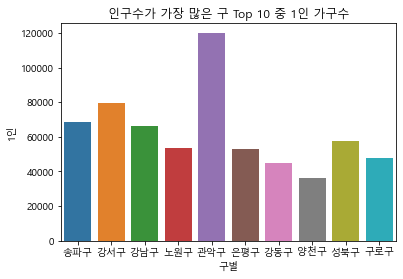

In [33]:
sns.barplot(x="구별", y="1인", data=drf2)
plt.title("인구수가 가장 많은 구 Top 10 중 1인 가구수")
plt.show()

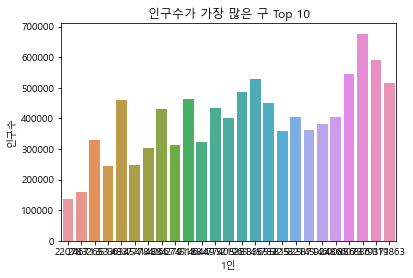

In [34]:
sns.barplot(x="1인", y="인구수", data=drf3)
plt.title("인구수가 가장 많은 구 Top 10")
plt.show()

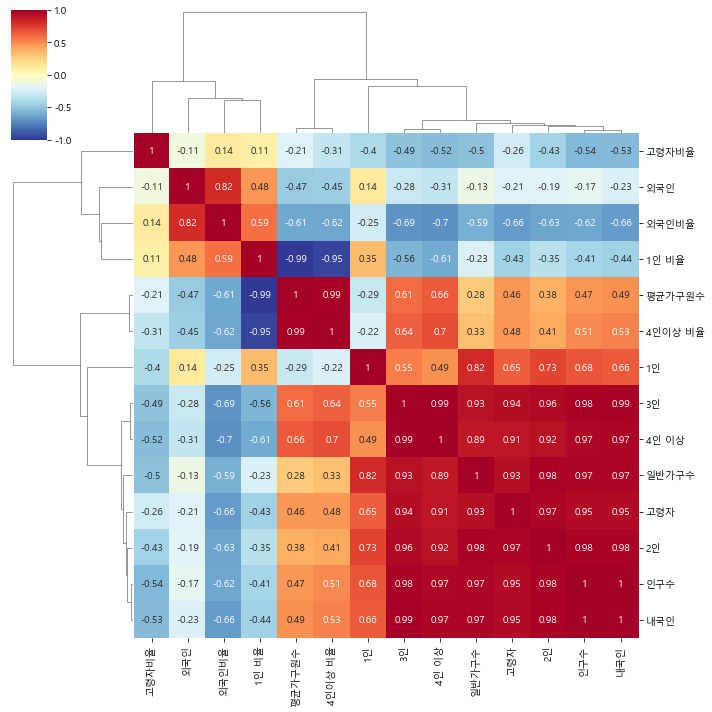

In [35]:
sns.clustermap(drf1_corr, 
               annot = True,        # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',   # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)

In [36]:
# 산점도 위에 상관관계를 나타내는 선 그리기
fp1 = np.polyfit(drf1['1인 비율'], drf1['외국인비율'], 1)
fp1

array([ 0.23480781, -4.92658962])

In [37]:
fx = np.array([20, 50])
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([-0.23043343,  6.81380087])

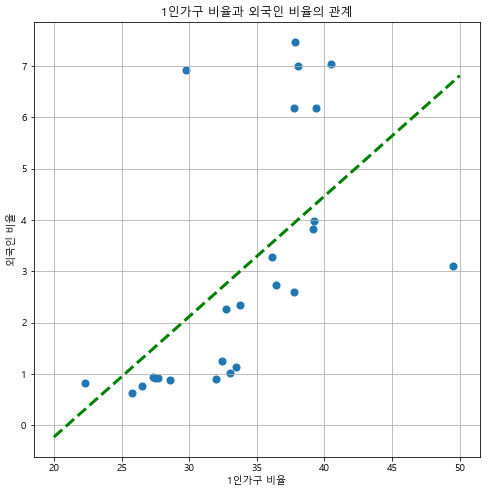

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(drf1['1인 비율'], drf1['외국인비율'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('1인가구 비율과 외국인 비율의 관계')
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')
plt.show()

In [39]:
drf1['오차'] = np.abs(drf1['외국인비율'] - f1(drf1['1인 비율']))
drf1_sort = drf1.sort_values('오차', ascending=False)
drf1_sort.head(6)

,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인 이상,평균가구원수,1인 비율,4인이상 비율,오차
구별,,,,,,,,,,,,,,,
구로구,435751,405579,30172,69312,6.924138,15.906332,160378,47740,43700,34624,36594,2.407712,29.767175,22.817344,4.861162
관악구,514555,498574,15981,78206,3.105790,15.198764,242154,119863,55423,34875,34039,1.952068,49.498666,14.056757,3.590293
영등포구,405982,375630,30352,60826,7.476194,14.982438,153923,58214,38671,29661,28847,2.218271,37.820209,18.741189,3.522303
금천구,249641,232157,17484,39361,7.003657,15.767041,99315,37778,25207,18771,18669,2.213593,38.038564,18.797765,2.998495
중구,135321,125800,9521,24265,7.035863,17.931437,54496,22078,14578,9540,8912,2.121972,40.513065,16.353494,2.449668
용산구,244953,229786,15167,39995,6.191800,16.327622,93177,35148,25164,17439,16452,2.190895,37.721755,17.656718,2.261027


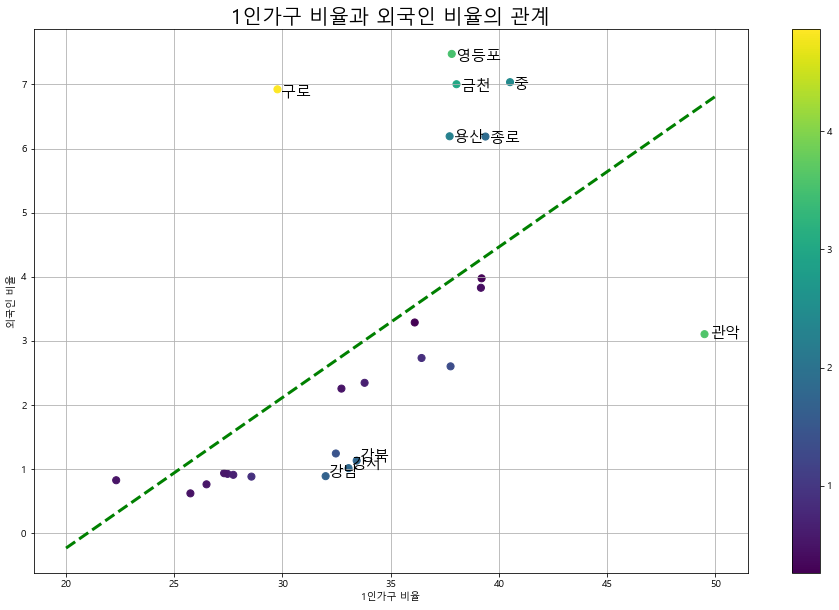

In [40]:
plt.figure(figsize=(16,10))
plt.scatter(drf1['1인 비율'], drf1['외국인비율'], c=drf1['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(drf1_sort['1인 비율'][i]*1.005, drf1_sort['외국인비율'][i]*0.985,
             drf1_sort.index[i][:-1], fontsize=15)

plt.grid(True)
plt.title('1인가구 비율과 외국인 비율의 관계', fontsize=20)
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')
plt.colorbar()
plt.show()